In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Algerian_forest_fires_clean_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
##drop month,day and yyear
df.drop(['day','month','year'],axis=1,inplace=True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
## Encoding
df['Classes'] = np.where(df['Classes'].str.contains("not fire"),0,1)

In [9]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [10]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [11]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [12]:
## Independent and Dependent Features 
X = df.drop('FWI',axis=1)
y = df['FWI']

In [13]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [14]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [15]:
## Train Test Split 
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [16]:
## Shape 
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [17]:
## Feature Selection based on correlation 
corr = X_train.corr()

<Axes: >

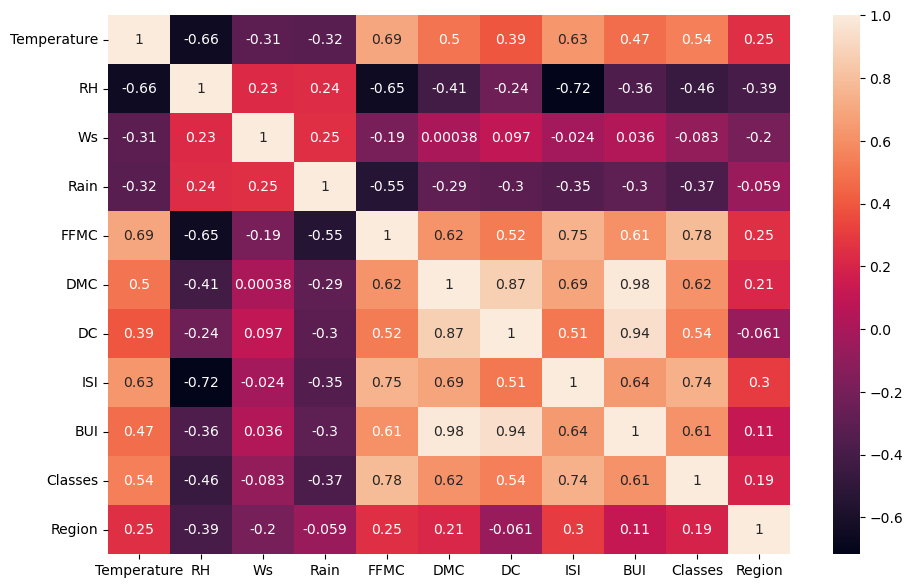

In [18]:
## Check for multicolinnearity 
plt.figure(figsize=(11,7))
sns.heatmap(corr,annot=True)

In [19]:
## For checking which columns are there which is higher than certain threshold 
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [20]:
## Threshold is set by domain expertise 
corr_features = correlation(X_train,0.85)

In [21]:
## Drop These feature when ccorrelation is more than 0.85 
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

### Feature Scaling or Standardization

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]], shape=(182, 9))

### Box Plots to understand Effect of Standaard Scaler

Text(0.5, 1.0, 'X_train After Scaling')

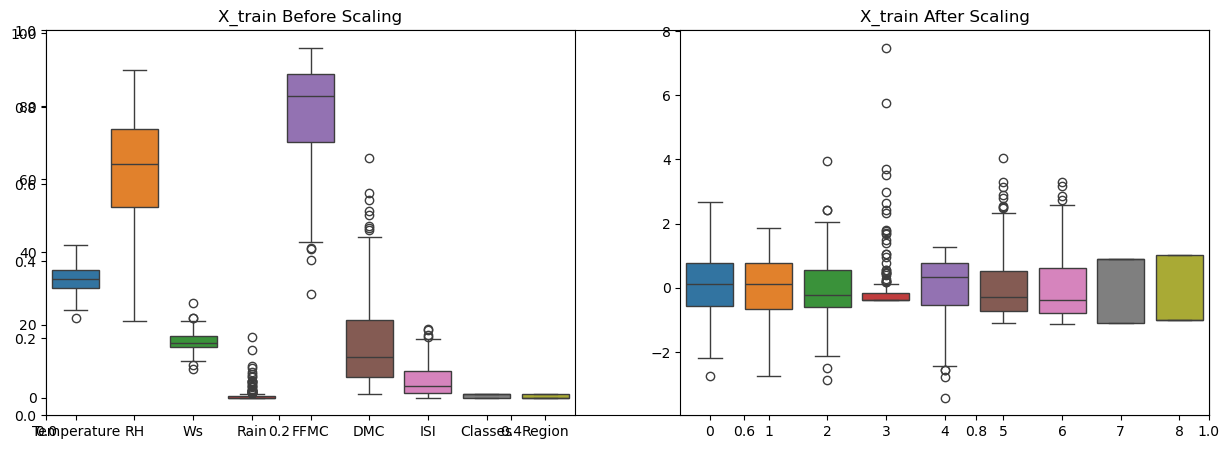

In [25]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

### Linear Regression Model

Mean Absolute Error: 0.5468236465249993
Mean Squared Error: 0.6742766873791594
R2-Score: 0.9839977157632893


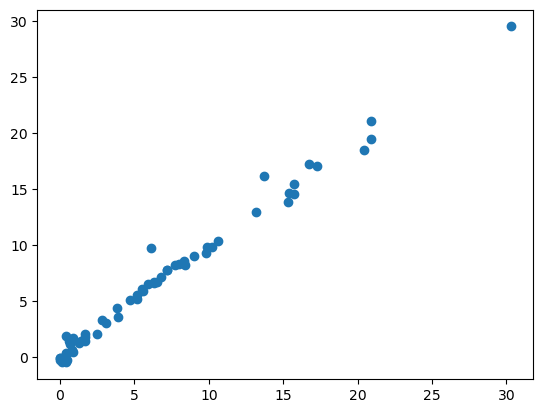

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_pred,y_test)
mse = mean_squared_error(y_pred,y_test)
score = r2_score(y_pred,y_test)
print('Mean Absolute Error:',mae)
print('Mean Squared Error:',mse)
print('R2-Score:',score)
plt.scatter(y_test,y_pred)

## Lasso Regression

Mean Absolute Error: 1.1331759949144085
Mean Squared Error: 2.248345891897475
R2-Score: 0.9264742326805692


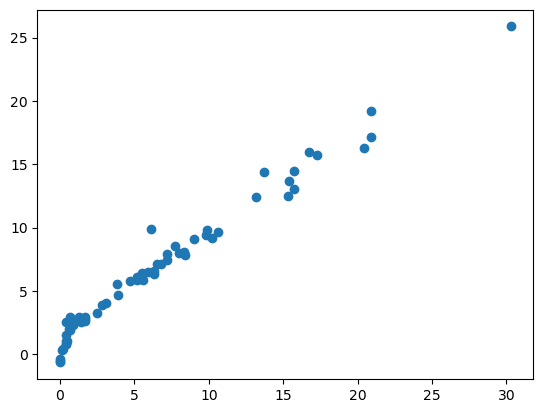

In [27]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_pred,y_test)
mse = mean_squared_error(y_pred,y_test)
score = r2_score(y_pred,y_test)
print('Mean Absolute Error:',mae)
print('Mean Squared Error:',mse)
print('R2-Score:',score)
plt.scatter(y_test,y_pred)

## Ridge Regression

Mean Absolute Error: 0.5642305340105721
Mean Squared Error: 0.6949198918152093
R2-Score: 0.9834070933284211


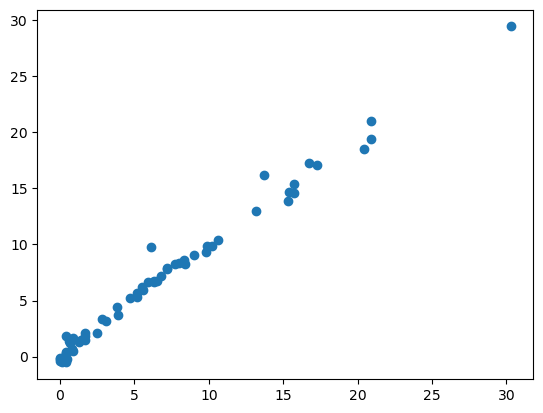

In [28]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_pred,y_test)
mse = mean_squared_error(y_pred,y_test)
score = r2_score(y_pred,y_test)
print('Mean Absolute Error:',mae)
print('Mean Squared Error:',mse)
print('R2-Score:',score)
plt.scatter(y_test,y_pred)

## ElasticNet Regression

Mean Absolute Error: 1.8822353634896
Mean Squared Error: 5.517251101025224
R2-Score: 0.7814447243400926


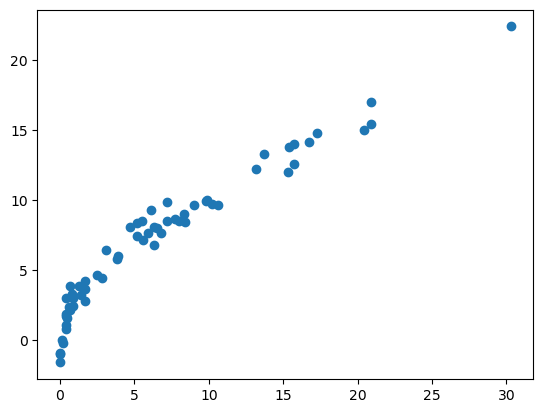

In [29]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_pred,y_test)
mse = mean_squared_error(y_pred,y_test)
score = r2_score(y_pred,y_test)
print('Mean Absolute Error:',mae)
print('Mean Squared Error:',mse)
print('R2-Score:',score)
plt.scatter(y_test,y_pred)

## LassoCV

In [30]:
from sklearn.linear_model import LassoCV 
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [31]:
y_pred = lassocv.predict(X_test_scaled)

In [32]:
lassocv.alpha_

np.float64(0.05725391318234408)

In [33]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [34]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

Mean Absolute Error: 0.6199701158263432
Mean Squared Error: 0.7924995554743627
R2-Score: 0.980851982434192


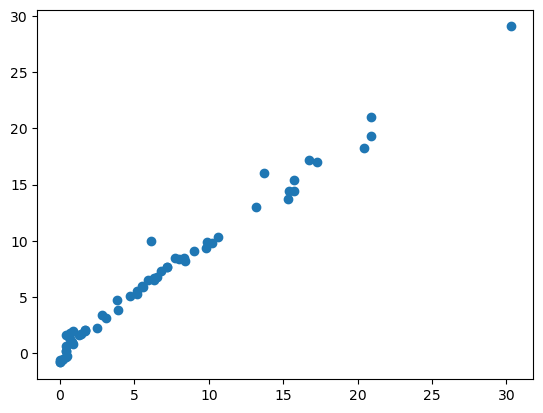

In [35]:
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_pred,y_test)
mse = mean_squared_error(y_pred,y_test)
score = r2_score(y_pred,y_test)
print('Mean Absolute Error:',mae)
print('Mean Squared Error:',mse)
print('R2-Score:',score)


## RidgeCV

Mean Absolute Error: 0.5642305340105721
Mean Squared Error: 0.6949198918152093
R2-Score: 0.9834070933284211


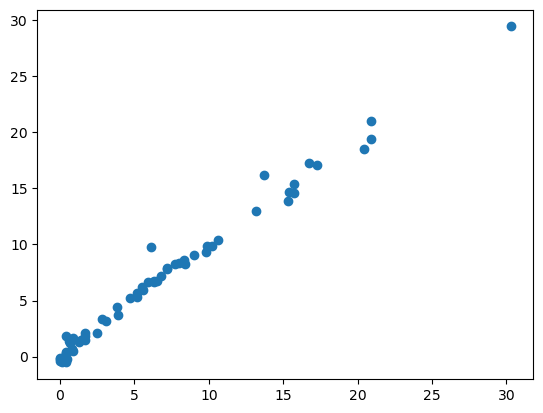

In [36]:
from sklearn.linear_model import RidgeCV 
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_pred,y_test)
mse = mean_squared_error(y_pred,y_test)
score = r2_score(y_pred,y_test)
print('Mean Absolute Error:',mae)
print('Mean Squared Error:',mse)
print('R2-Score:',score)
plt.scatter(y_test,y_pred)

In [37]:
ridgecv.alpha_

np.float64(1.0)

In [38]:
ridgecv.alphas

(0.1, 1.0, 10.0)

In [39]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': False}

## ElasticNetCV

Mean Absolute Error: 0.6575946731430905
Mean Squared Error: 0.8222830416276268
R2-Score: 0.9799084998743879


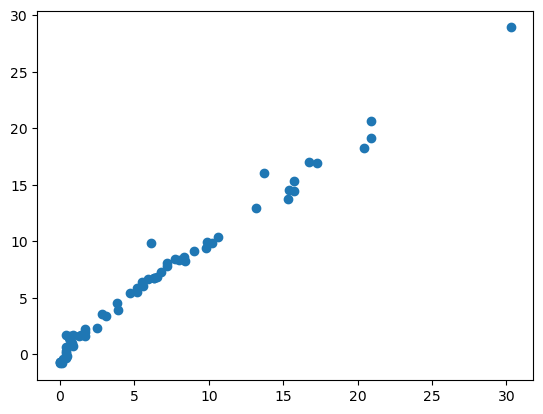

In [40]:
from sklearn.linear_model import ElasticNetCV 
elasticnetcv = ElasticNetCV(cv=5)
elasticnetcv.fit(X_train_scaled,y_train)
y_pred = elasticnetcv.predict(X_test_scaled)
mae = mean_absolute_error(y_pred,y_test)
mse = mean_squared_error(y_pred,y_test)
score = r2_score(y_pred,y_test)
print('Mean Absolute Error:',mae)
print('Mean Squared Error:',mse)
print('R2-Score:',score)
plt.scatter(y_test,y_pred)

## Pickle the machine learning models, preprocessing model standardscaler

In [41]:
ridge

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [42]:
scaler

,copy,True
,with_mean,True
,with_std,True


In [43]:
import pickle 
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))